In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting Data

In [2]:
# Load the train and test datasets
train = pd.read_csv("../loan_data_set/loan-train.csv")
test = pd.read_csv("../loan_data_set/loan-test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
(train.shape, test.shape)

((614, 13), (367, 12))

# Data Cleaning

In [6]:
# Drop unecessary variables
train = train.drop(['Loan_ID'], axis=1)
test = test.drop(['Loan_ID'], axis=1)

In [7]:
# Check for missing values in the train dataset
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Check for missing values in the test dataset
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
print("Total number of missing values in the train dataset: ", train.isnull().sum().sum())
print("Total number of missing values in the test dataset: ", test.isnull().sum().sum())

Total number of missing values in the train dataset:  149
Total number of missing values in the test dataset:  84


In [10]:
print(train['Gender'].value_counts(), '\n')
print(train['Married'].value_counts(), '\n')
print(train['Dependents'].value_counts(), '\n')
print(train['Self_Employed'].value_counts(), '\n')
print(train['LoanAmount'].value_counts(), '\n')
print(train['Loan_Amount_Term'].value_counts(), '\n')
print(train['Credit_History'].value_counts(), '\n')

Gender
Male      489
Female    112
Name: count, dtype: int64 

Married
Yes    398
No     213
Name: count, dtype: int64 

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64 

Self_Employed
No     500
Yes     82
Name: count, dtype: int64 

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64 

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64 

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64 



In [11]:
# Impute the missing values in the train dataset
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [12]:
print(test['Gender'].value_counts(), '\n')
print(test['Married'].value_counts(), '\n')
print(test['Dependents'].value_counts(), '\n')
print(test['Self_Employed'].value_counts(), '\n')
print(test['LoanAmount'].value_counts(), '\n')
print(test['Loan_Amount_Term'].value_counts(), '\n')
print(test['Credit_History'].value_counts(), '\n')

Gender
Male      286
Female     70
Name: count, dtype: int64 

Married
Yes    233
No     134
Name: count, dtype: int64 

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64 

Self_Employed
No     307
Yes     37
Name: count, dtype: int64 

LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: count, Length: 144, dtype: int64 

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64 

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64 



In [13]:
# Impute the missing values in the test dataset
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [14]:
# Remove incorrect values in the train dataset
train = train.loc[train['Gender'].isin(['Male', 'Female'])]
train = train.loc[train['Married'].isin(['Yes', 'No'])]
train = train.loc[train['Dependents'].isin(['0', '1', '2', '3+'])]
train = train.loc[train['Education'].isin(['Graduate', 'Not Graduate'])]
train = train.loc[train['Self_Employed'].isin(['Yes', 'No'])]
train = train[train['ApplicantIncome'] >= 0]
train = train[train['CoapplicantIncome'] >= 0]
train = train[train['LoanAmount'] >= 0]
train = train[train['Loan_Amount_Term'] >= 0]
train = train[train['Credit_History'] >= 0]
train = train.loc[train['Property_Area'].isin(['Urban', 'Semiurban', 'Rural'])]
train = train.loc[train['Loan_Status'].isin(['Y', 'N'])]

In [15]:
# Remove incorrect values in the test dataset
test = test.loc[test['Gender'].isin(['Male', 'Female'])]
test = test.loc[test['Married'].isin(['Yes', 'No'])]
test = test.loc[test['Dependents'].isin(['0', '1', '2', '3+'])]
test = test.loc[test['Education'].isin(['Graduate', 'Not Graduate'])]
test = test.loc[test['Self_Employed'].isin(['Yes', 'No'])]
test = test[test['ApplicantIncome'] >= 0]
test = test[test['CoapplicantIncome'] >= 0]
test = test[test['LoanAmount'] >= 0]
test = test[test['Loan_Amount_Term'] >= 0]
test = test[test['Credit_History'] >= 0]
test = test.loc[test['Property_Area'].isin(['Urban', 'Semiurban', 'Rural'])]

In [16]:
# The train and test datasets both have no incorrect values
(train.shape, test.shape)

((614, 12), (367, 11))

# Categorical Variable vs Target Variable

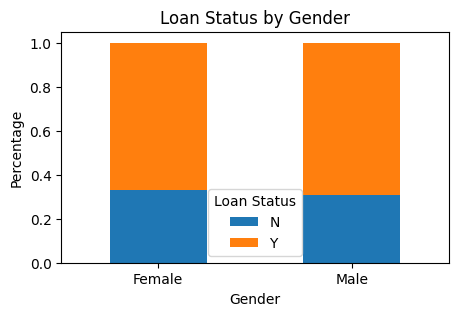

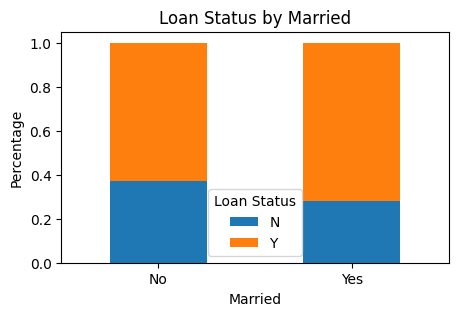

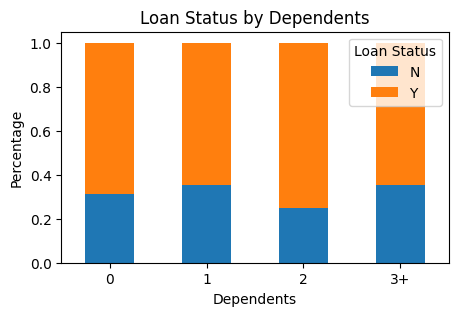

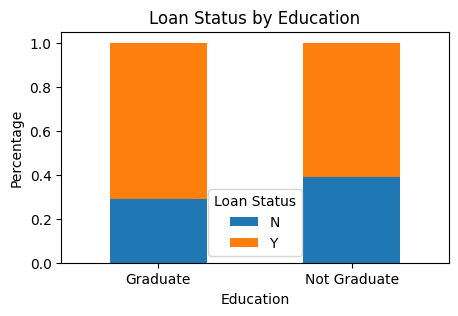

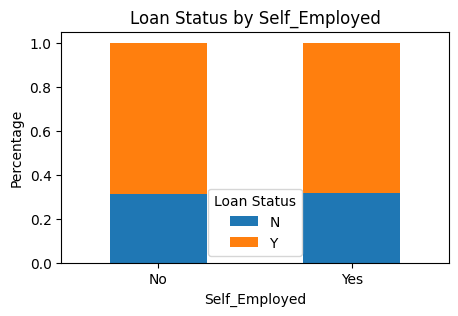

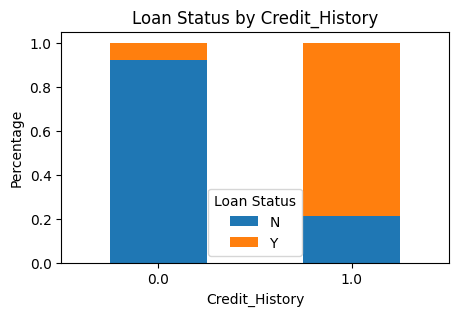

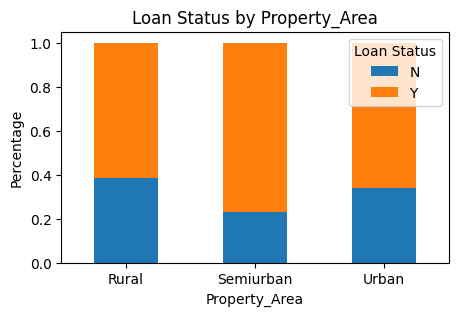

In [17]:
costumer_info = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Plot the proportion of loan statuses for each categorical variables as stacked bar charts
for info in costumer_info:
    crosstab = pd.crosstab(train[info], train['Loan_Status'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(5,3))
    plt.title(f'Loan Status by {info}')
    plt.legend(title='Loan Status')
    plt.xlabel(info)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.show()

# Numerical Variable vs Target Variable

<Axes: >

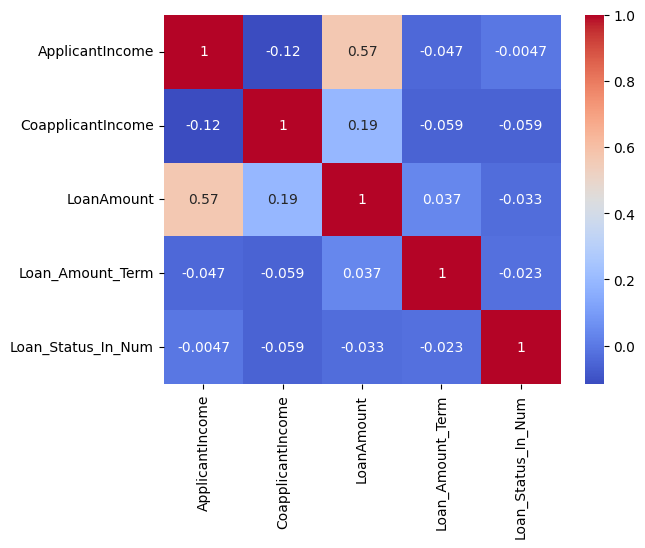

In [18]:
# Encode 'Loan_Status' and calculate the correlation matrix
train['Loan_Status_In_Num'] = train['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
correlation_matrix = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status_In_Num']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')